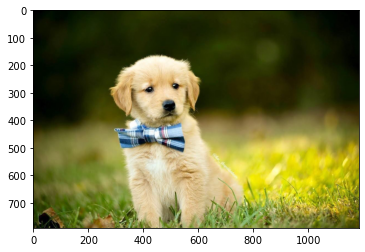

In [1]:
"""K means finds the means of Clusters, cluster the image in 2"""
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

n_colors = 2 #Number of output value after quantization

#Load the image
image_raw = io.imread("images/testing_image.jpeg")
image = np.array(image_raw,dtype = np.float32) /255 #Normalising make it 0~1
h,w,d = image.shape
image_array = np.reshape(image_raw,(h*w,d))
plt.imshow(image_raw)
plt.show()

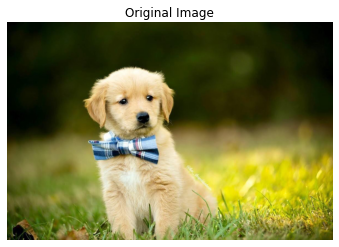

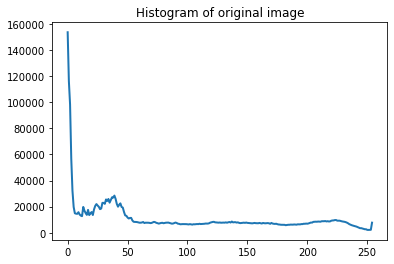

In [2]:
#Plotting images
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original Image")
plt.imshow(image_raw)

#Histogram of original image
plt.figure(2)
plt.clf()
plt.title("Histogram of original image")
hist = np.histogram(image_raw,bins = np.arange(0,256))
plt.plot(hist[1][:-1],hist[0],lw=2)
plt.show()

In [3]:
#Quantizer trained (using k means
#Picking out a random image samples from image_array
image_array_sample = shuffle(image_array, random_state = 0)[:1000]
kmeans = KMeans(n_clusters=n_colors).fit(image_array_sample)
labels = kmeans.predict(image_array)

In [4]:
#Creating the quantized image
image_out = np.zeros((h,w,d))
label_idx = 0
for i in range(h):
    for j in range(w):
        image_out[i][j] = kmeans.cluster_centers_[labels[label_idx]]
        label_idx += 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


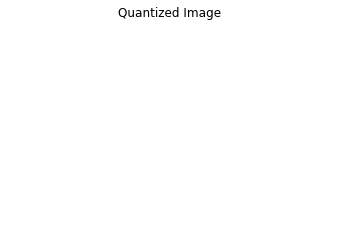

In [5]:
#Quantized image
plt.figure(3)
plt.clf()
plt.axis("off")
plt.title("Quantized Image")
plt.imshow(image_out)

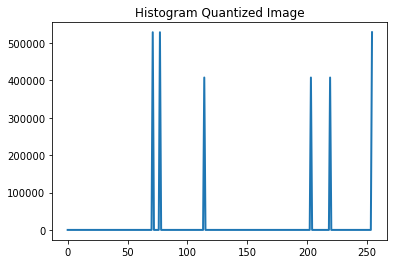

In [6]:
image_out  = np.array(image_out*255, dtype=np.uint8)

#Histogram quantized image
plt.figure(4)
plt.clf()
plt.title("Histogram Quantized Image")
hist = np.histogram(image_out, bins = np.arange(0,256))
plt.plot(hist[1][:-1],hist[0],lw = 2)